# Calculadora de circuitos RLC en serie

```
Autor: Sandro León Pastorini

Universidad Tecnológica Nacional, Facultad Regional Concepción del Uruguay (UTN - FRCU)

Cátedra: Física 2 (K952D)

Profesor a cargo: Dra. Sonia Brühl
Ayud. de 1era: Lic. Diego Conte
Ayud. de 1era: Ing. Emanuel Dri

28 de Julio de 2020

```


In [ ]:
import numpy as np
from matplotlib import pyplot
from google.colab import drive
from decimal import Decimal


# Parámetros de entrada

In [ ]:
fem_maxima =  100#@param{type:"number"}
frecuencia =  80#@param{type:"number"}
resistencia = 20 #@param{type:"number"}
inductancia =  2#@param{type:"number"}
capacitancia =  0.000001#@param{type:"number"}





# Impedancias inductiva, capacitiva y compleja

In [ ]:
# IMPEDNACIAS INDEUCTIVA, CAPACITIVA Y Z
# calculamos la frecuencia angular
omega = 2*np.pi*frecuencia

# determinamos las impedancias inductiva y capacitiva
if inductancia > 0:
  impedancia_inductiva = omega*inductancia
else:
  impedancia_inductiva = 0
if capacitancia > 0:
  impedancia_capacitiva = 1/(omega*capacitancia)
else:
  impedancia_capacitiva = 0

# calculamos la impedancia z
z = np.sqrt(np.power(resistencia, 2)+ np.power(impedancia_inductiva - impedancia_capacitiva, 2))

# Intensidad máxima

In [ ]:
# INTENSIDAD MÁXIMA

intensidad_maxima = fem_maxima/(resistencia)

# Diferencia de potencial entre componentes

In [ ]:
# DIFERENCIA DE POTENCIAL ENTRE COMPONENTES

voltaje_resistencia = intensidad_maxima * resistencia
voltaje_inductancia =intensidad_maxima * impedancia_inductiva
voltaje_capacitancia = intensidad_maxima * impedancia_capacitiva

# Potencia media

In [ ]:
# POTENCIA MEDIA

intensidad_rms = intensidad_maxima/np.sqrt(2)
potencia_media = np.power(intensidad_rms, 2)*resistencia

# Frecuencia de resonancia

In [ ]:
# FRECUENCIA DE RESONANCIA
frecuencia_resonancia = 0
if (inductancia != 0 and capacitancia != 0):
  frecuencia_angular_resonancia = 1/np.sqrt(inductancia*capacitancia)
  frecuencia_resonancia = frecuencia_angular_resonancia/(2*np.pi)

# Factor de calidad Q

In [ ]:
# FACTOR DE CALIDAD Q

factor_q = 0
if resistencia > 0:
  factor_q = frecuencia_angular_resonancia*inductancia/resistencia

# Factor de potencia $\cos\varphi$

In [ ]:
# FACTOR DE POTENCIA cosφ

if z != 0:
  factor_potencia = resistencia/z

# Impedancia dominante

In [ ]:
# QUÉ IMPEDANCIA DOMINA EL COMPORTAMIENTO DEL CIRCUITO

if resistencia > impedancia_capacitiva:
  if resistencia > impedancia_inductiva:
    impedancia_dominante = "RESISTIVA"
  else:
    impedancia_dominante = "INDUCTIVA"
elif impedancia_capacitiva > impedancia_inductiva:
  impedancia_dominante = "CAPACITIVA"
else:
  impedancia_dominante = "INDUCTIVA"

# Diagrama de fasores

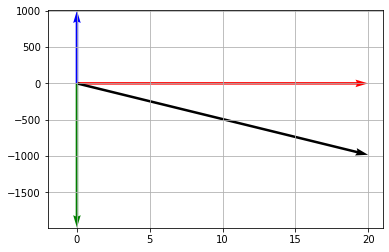

In [ ]:
# DIAGAMA DE FASORES DE TENSIONES

angulo_fase = np.arccos(factor_potencia)

# función auxiliar para calcular las coordenadas de dirección para cada vector
direccion = lambda angulo, offset: np.array([np.cos(angulo+offset), np.sin(angulo + offset)])

# definimos los vectores para cada fasor
fasor_resistencia = [resistencia, 0]
fasor_inductancia = [0,impedancia_inductiva]
fasor_capacitancia = [0,-impedancia_capacitiva]
fasor_z = [resistencia, impedancia_inductiva-impedancia_capacitiva]

# finalmente creamos un vector auxiliar con los fasores escalados
V = np.array([fasor_resistencia, fasor_inductancia, fasor_capacitancia, fasor_z])


# indicamos cuadrícula, límites de los ejes, origen
origin = [0,0,0], [0,0,0] # origin point
pyplot.xlim(-resistencia/10,resistencia+1)
pyplot.ylim(-impedancia_capacitiva-1,impedancia_inductiva+1)
pyplot.grid()

# función de plot
pyplot.quiver([0,0,0,0], [0,0,0,0], V[:,0], V[:,1], color=['r','b','g','k'],angles='xy',scale_units='xy',scale=1)

# Gráfico tensión - tiempo para la resistencia, la capacitancia y el inductor junto con la fuente 

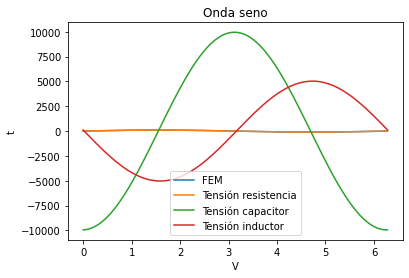

<Figure size 600x400 with 0 Axes>

In [ ]:
 # Las tensiones VL, VC, VR y ε superpuestas en el dominio del tiempo.

# generamos un vector de 2000 elementos, con valores entre 0 y 2π en pasos de π/1000
pi=np.pi
t = [i for i in np.arange(0,2*pi,pi/1000)] 

# calculamos los puntos para las tensiones
g_tension_fem = fem_maxima * np.cos(t - np.ones(len(t))*angulo_fase)
g_tension_resistor = intensidad_maxima * resistencia * np.cos(t - np.ones(len(t))*angulo_fase)
g_tension_capacitor = intensidad_maxima * impedancia_capacitiva * np.cos(t-np.ones(len(t))*pi/2 - np.ones(len(t))*angulo_fase)
g_tension_inductor = intensidad_maxima * impedancia_inductiva * np.sin(t+np.ones(len(t))*pi/2 + np.ones(len(t))*angulo_fase)

pyplot.plot(t, g_tension_fem, t,g_tension_resistor, t,g_tension_capacitor, t,g_tension_inductor, '-')

# nombramos ejes y gráfico
pyplot.xlabel("V")
pyplot.ylabel("t")
pyplot.title("Onda seno")
pyplot.legend(["FEM", "Tensión resistencia","Tensión capacitor", "Tensión inductor"])
pyplot.figure(dpi=100)
pyplot.show()

# Ecuaciones para la tensión y la corriente

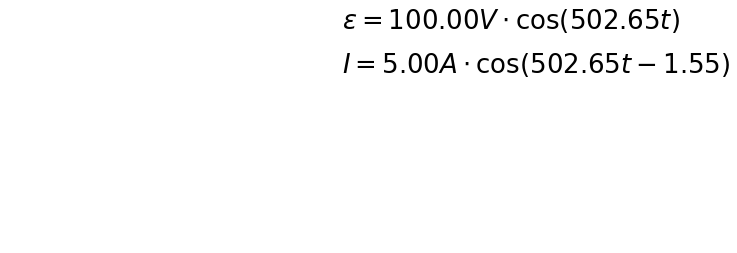

In [ ]:
# Las ecuaciones de la FEM y la corriente con los valores correspondientes a los datos de entrada.

# ecuación para la tensión
pyplot.text(1, 1,r'$\epsilon = %1.2f V \cdot \cos{\left(%1.2f t \right)} $'%(fem_maxima,omega),fontsize=26)

# ecuación para la corriente
pyplot.text(1, 0.8,r'$I = %1.2f A \cdot \cos{\left(%1.2f t - %1.2f\right)} $'%(intensidad_maxima,omega,angulo_fase),fontsize=26)

pyplot.axis('off')
pyplot.show()

# Diagrama del circuito y resumen de sus características

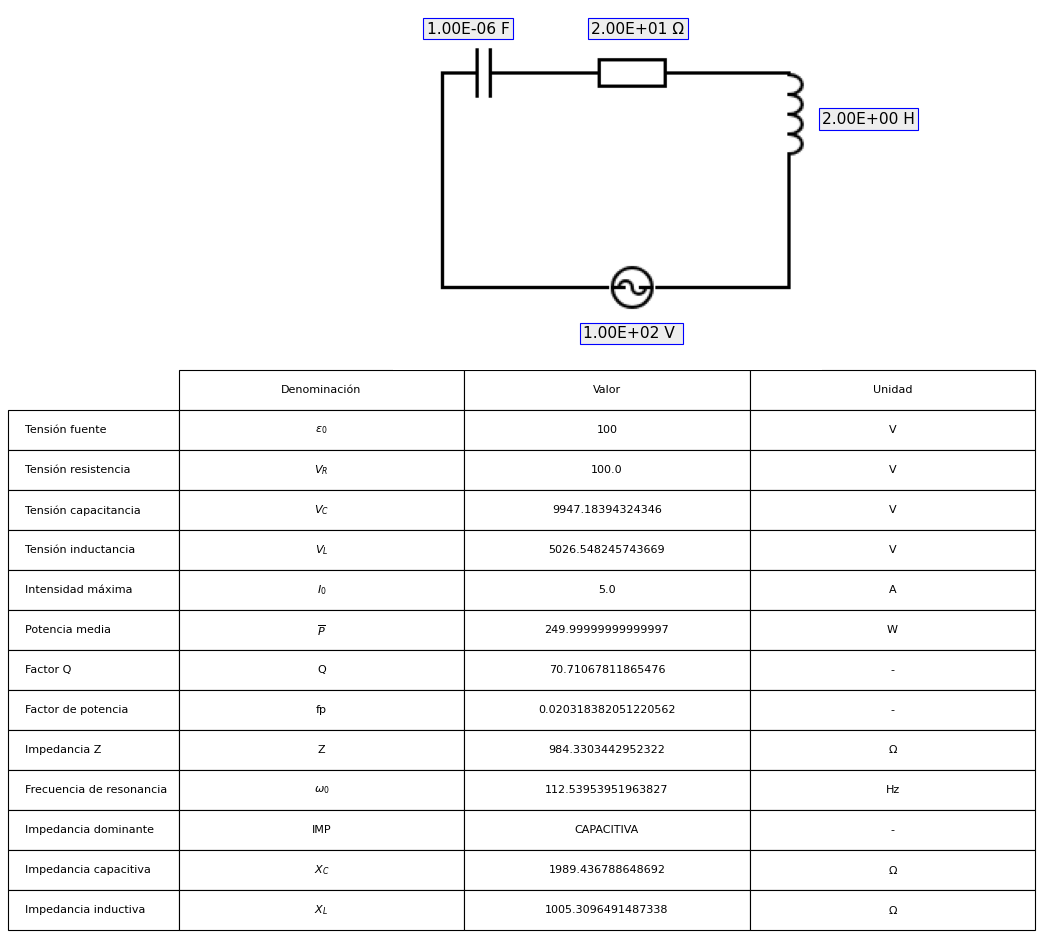

In [ ]:
# indicamos el tamaño de la figura que se va a dibujar
pyplot.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

# cargamos y mostramos la imagen del circuito 
imagen_circuito = pyplot.imread("http://drive.google.com/uc?export=view&id=1RS7SmFY3ERKXRv_CiZjpW9o9dTdsmrvq")
pyplot.imshow(imagen_circuito)

# dibujamos cuadros de texto con la resistencia, capacitancia, inductancia y tensión del circuito
pyplot.text(120, 15, r"%.2E Ω" %Decimal(resistencia), fontsize=14, bbox=dict(facecolor='#eee', edgecolor='blue', pad=3.0))
pyplot.text(20, 15, r"%.2E F" % Decimal(capacitancia), fontsize=14, bbox=dict(facecolor='#eee', edgecolor='blue', pad=3.0))
pyplot.text(260, 70, r"%.2E H" % Decimal(inductancia), fontsize=14, bbox=dict(facecolor='#eee', edgecolor='blue', pad=3.0))
pyplot.text(115, 200, r"%.2E V " % Decimal(fem_maxima), fontsize=14, bbox=dict(facecolor='#eee', edgecolor='blue', pad=3.0))
pyplot.axis("off")

# a continuacióna armamos una tabla resumiendo las características del circuito

# cabecera (izquierda) para la lista
cabecera = [
         "Tensión fuente", 
         "Tensión resistencia", 
         "Tensión capacitancia",
         "Tensión inductancia", 
         "Intensidad máxima",
         "Potencia media",
         "Factor Q",
         "Factor de potencia",
         "Impedancia Z",
         "Frecuencia de resonancia",
         "Impedancia dominante",
         "Impedancia capacitiva",
         "Impedancia inductiva",
         ]

# contenido de las celdas para la tabla
# separado en 3 secciones:
# a. denominación de la variable
# b. valor calculado
# c. unidad correspondiente
datos = list(zip(*[[
                    r"$\epsilon_0$",
                    r"$V_R$",
                    r"$V_C$",
                    r"$V_L$",
                    r"$I_0$",
                    r"$\overline{P}$",
                    "Q",
                    "fp",
                    "Z",
                    r"$\omega_0$",
                    "IMP",
                    "$X_C$",
                    "$X_L$"
                  ],[
                    fem_maxima, 
                    voltaje_resistencia,
                    voltaje_capacitancia,
                    voltaje_inductancia,
                    intensidad_maxima,
                    potencia_media,
                    factor_q,
                    factor_potencia,
                    z,
                    frecuencia_resonancia,
                    impedancia_dominante,
                    impedancia_capacitiva,
                     impedancia_inductiva
                  ],[
                   "V",
                   "V",
                   "V",
                   "V",
                   "A",
                   "W",
                   "-",
                   "-",
                   "Ω",
                   "Hz",
                   "-",
                   "$\Omega$",
                   "$\Omega$"
                   ]]))



# dibujamos la tabla
pyplot.table(rowLabels=cabecera, colLabels=["Denominación", "Valor", "Unidad"], cellText=datos, loc="bottom", cellLoc="center").scale(2,3)
pyplot.subplots_adjust(wspace=.5)
